In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Replicating the pseudoscience preprint of Williams 2015
Link: http://vixra.org/abs/1506.0181

In [11]:
# read in data
filename = "noaa_global_temps.xlsx"
filedata = pd.read_excel(filename)
final_year = 2014 # Williams probably only had access to data through 2014 since it was written in 2015
inds = (filedata['Year'] >= 1900) & (filedata['Year'] <= final_year)

T = filedata['noaa'].values[inds]
t = filedata['Year'].values[inds].astype(np.float64)

# 5-year running average
T_smooth = np.zeros_like(T)
for i in range(len(T_smooth)):
    T_smooth[i] = np.average(T[max(i-1,0):min(len(T_smooth),i+1)])
    
# extrapolation
t_extrapolate = np.arange(1900.,2100.,1.)

In [16]:
# function for producing an n-th order polynomial fit
def n_fit(n):
    fit_args = np.polyfit(t, T_smooth, n)

    T_fit = np.zeros_like(t_extrapolate)

    for n_minus_order, coeff in enumerate(fit_args):
        order = n-n_minus_order
        T_fit += coeff*t_extrapolate**order

    return T_fit

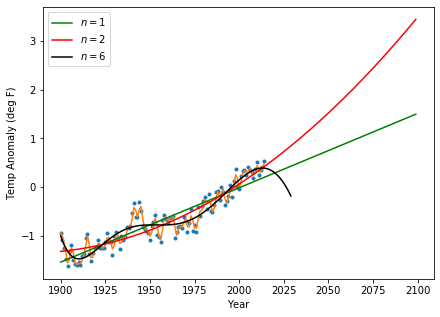

In [22]:
# Replicating the key plot from Williams 2015
plt.figure(figsize=(7,5))
plt.plot(t,T*1.8,'.')
plt.plot(t,T_smooth*1.8,'C1-')
plt.plot(t_extrapolate,n_fit(1)*1.8, 'g-', label=r"$n=$"+str(1))
plt.plot(t_extrapolate,n_fit(2)*1.8, 'r-', label=r"$n=$"+str(2))
plt.plot(t_extrapolate[t_extrapolate < 2030],n_fit(6)[t_extrapolate < 2030]*1.8,'k-', label=r"$n=$"+str(6))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Temp Anomaly (deg F)")
plt.savefig(f"replicated_to_2030.png",dpi=100)

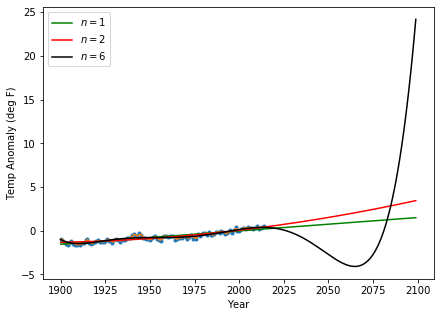

In [18]:
# Expanding the 6th-order polynomial "prediction" of Williams 2015 to expose how ridiculous it is!
plt.figure(figsize=(7,5))
plt.plot(t,T*1.8,'.')
plt.plot(t,T_smooth*1.8,'C1-')
plt.plot(t_extrapolate,n_fit(1)*1.8, 'g-', label=r"$n=$"+str(1))
plt.plot(t_extrapolate,n_fit(2)*1.8, 'r-', label=r"$n=$"+str(2))
plt.plot(t_extrapolate,n_fit(6)*1.8,'k-', label=r"$n=$"+str(6))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Temp Anomaly (deg F)")
plt.savefig(f"replicated_to_2100.png",dpi=100)